In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("UpdatedResumeDataset.csv")

In [3]:
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [7]:
df.shape

(962, 2)

In [12]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

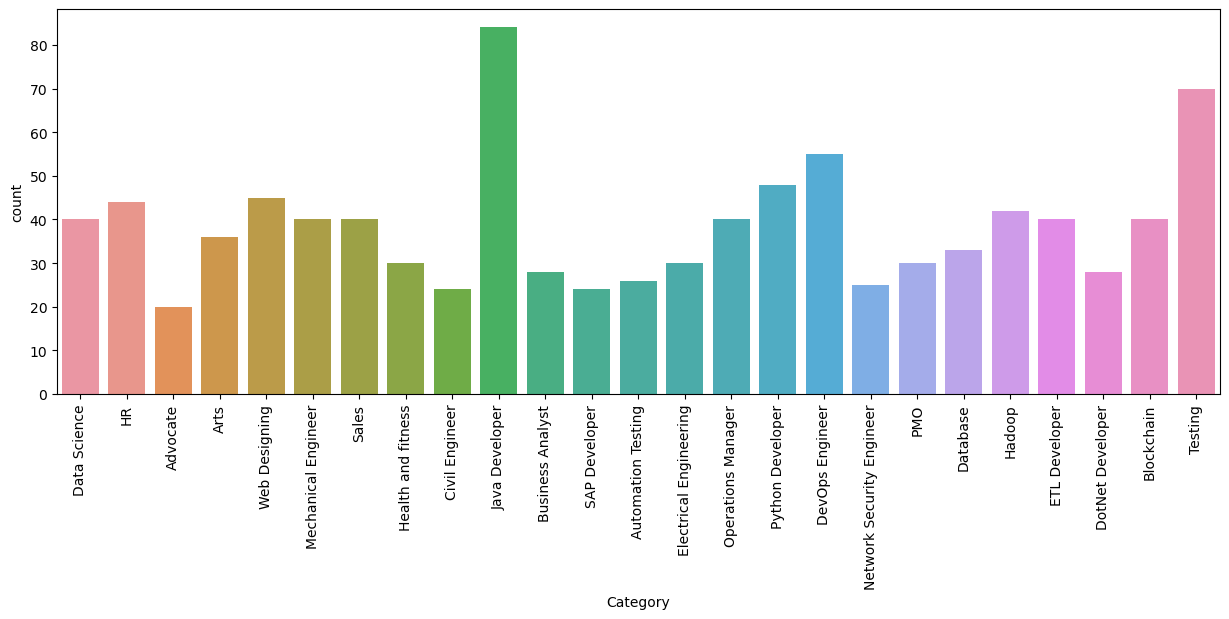

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x = 'Category')
plt.xticks(rotation = 90)
plt.show()


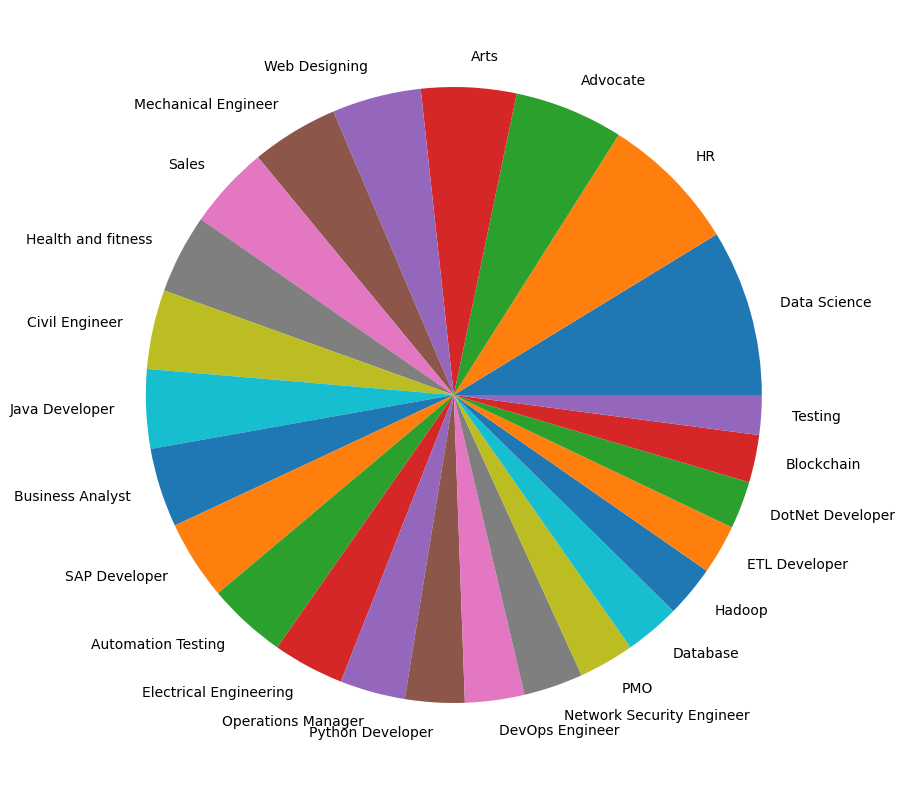

In [10]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15, 10))
plt.pie(counts, labels = labels)
plt.show()

In [5]:
df['Category'][0]

'Data Science'

In [8]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [4]:
import re

def clean_Resume(txt):
    
    cleantext = re.sub(r'[^a-zA-Z0-9]', ' ', txt)
    return cleantext


In [9]:
clean_Resume('Skills * Programming Languages')

'Skills   Programming Languages'

In [14]:
df['Resume'] = df['Resume'].apply(lambda x: clean_Resume(x))

In [15]:
df['Resume']

0      Skills   Programming Languages  Python  pandas...
1      Education Details   May 2013 to May 2017 B E  ...
2      Areas of Interest Deep Learning  Control Syste...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details    MCA   YMCAUST   Faridabad...
                             ...                        
957    Computer Skills      Proficient in MS office  ...
958        Willingness to accept the challenges      ...
959    PERSONAL SKILLS     Quick learner      Eagerne...
960    COMPUTER SKILLS   SOFTWARE KNOWLEDGE MS Power ...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
lr.fit(df['Category'])
df['Category'] = lr.transform(df['Category'])

In [30]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
cv.fit(df['Resume'])
rv = cv.transform(df['Resume'])

In [49]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(rv, df['Category'], test_size = 0.2, random_state = 42)

In [44]:
X_train.shape

(769, 7384)

In [45]:
X_test.shape

(193, 7384)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 5)

In [53]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = clf.predict(X_test)

In [57]:
print(accuracy_score(y_test, y_pred))

0.9585492227979274


In [62]:
sample_resume = ["Skilled in Python, machine learning, and data analysis. Worked with TensorFlow and Pandas for predictive modeling."] 

In [67]:
sample_cv = cv.transform(sample_resume)


In [69]:
pred = clf.predict(sample_cv)

In [70]:
pred

array([12], dtype=int64)